<a href="https://colab.research.google.com/github/MuhammadAhtishamYousaf/LangGraph/blob/main/Lec_2.1_tools_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Actions and Structure Messages

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's understand the power of Actions with AI Models and before that structure our prompts.

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation.

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`.

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call.

Let's create a list of messages.

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


From now let's use HumanMessage to pass our Prompt to Model

In [2]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [3]:
%pip install --quiet -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.6 MB/s eta 0:00:00


In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

In [ ]:
simple_call = llm.invoke("Hi")
print(simple_call)

content='Hi there! What can I do for you today? \n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-0bfdfcef-c7ee-4939-a8f4-4fb0756330b6-0' usage_metadata={'input_tokens': 2, 'output_tokens': 12, 'total_tokens': 14}


In [ ]:
messages = [HumanMessage(content="What is your name?")]
result = llm.invoke(messages)
print(result)

content="I am a large language model, trained by Google. I don't have a name. \n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-b87dc777-45c1-417c-9cce-5d23f78d88a5-0' usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26}


In [ ]:
system_human_message = [
                SystemMessage(content="You are a helpful assistant! Your name is Bob."),
                HumanMessage(content="What is your name?")
            ]
result = llm.invoke(system_human_message)
print(result)



content='Hi there! My name is Bob. 😊  How can I help you today? \n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-4176d413-4e4b-4b37-a5df-45e436c0a6ff-0' usage_metadata={'input_tokens': 17, 'output_tokens': 17, 'total_tokens': 34}


In [ ]:
context_call = llm.invoke(messages)
print(context_call)

content='I am a large language model, trained by Google.' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-679795af-80ff-4fa9-a360-b594054bf104-0' usage_metadata={'input_tokens': 6, 'output_tokens': 11, 'total_tokens': 17}


## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language.

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user.

And, it will return an output that adheres to the tool's schema.

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple.

You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

In [5]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

In [6]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

## Tool Calling

In [ ]:
print("\n\nllm\n", llm, "\n\n\n")



llm
 model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x127929bb0> async_client=<google.ai.generativelanguage_v1beta.services.generative_service.async_client.GenerativeServiceAsyncClient object at 0x127931d60> default_metadata=() 





In [20]:
def deposit_money(name: str, bank_account_no: int,amount: int):
    """Deposit Money in Bank account.

    Args:
        name: first name of the person
        bank_account_no: second bank account id
        amount: third amount to be deposited
    """
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return f"{amount} Deposited Successfule in {name}'s Account with account id {bank_account_no}"

In [21]:
deposit_money("Muhammad", 123, 7000)

"7000 Deposited Successfule in Muhammad's Account with account id 123"

In [10]:
llm_with_tools = llm.bind_tools([deposit_money])

In [11]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7924fac64610>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'deposit_money', 'description': 'Deposit Money in Bank account.', 'parameters': {'properties': {'name': {'description': 'first name of the person', 'type': 'string'}, 'bank_account_no': {'description': 'second bank account id', 'type': 'integer'}, 'amount': {'description': 'third amount to be deposited', 'type': 'integer'}}, 'required': ['name', 'bank_account_no', 'amount'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [12]:
from langchain_core.messages import HumanMessage

In [14]:
call = llm.invoke(
    [HumanMessage(content=f"Deposit $200  in Ahmad Account. His acc number is 12345445", name="Muhammad Ahtisham")])
call


AIMessage(content="Okay, I've noted the instruction to deposit $200 into Ahmad's account (account number 12345445).  However, I am an AI and cannot perform real-world actions like making bank deposits.  You will need to use your bank's online system, mobile app, or visit a branch to complete this transaction.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-ba53ee35-27dd-4993-b860-292793de2b18-0', usage_metadata={'input_tokens': 23, 'output_tokens': 77, 'total_tokens': 100, 'input_token_details': {'cache_read': 0}})

In [17]:
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Deposit $200 in Ahtisham Account. His acc number is 12345654", name="Muhammad Ahtisham")])
call

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"bank_account_no": 12345654.0, "amount": 200.0, "name": "Ahtisham"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-2476e8d0-ab2a-4cec-8810-300e70eca590-0', tool_calls=[{'name': 'deposit_money', 'args': {'bank_account_no': 12345654.0, 'amount': 200.0, 'name': 'Ahtisham'}, 'id': '148a8292-b246-4c5a-bbe5-82707d1ea5e2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 61, 'output_tokens': 13, 'total_tokens': 74, 'input_token_details': {'cache_read': 0}})

### Building Graph

In [24]:
# We have an LLM Capable of Tool Calling: using bind_tools

# Now Lets do the Orchestration Through LangGraph
llm_with_tools = llm.bind_tools([deposit_money])
# 0.  State

from typing_extensions import TypedDict

class LastMessageState(TypedDict):
  messages: list

# 1. tool calling llm ki Node

def call_llm(state: LastMessageState):
  messages = state["messages"]
  call_response = llm_with_tools.invoke(messages)
  # messages.append(call_response)

  # return {"messages": messages}
  return {"messages": [call_response]}

# 2. Graph

from langgraph.graph import StateGraph, START, END

maker: StateGraph = StateGraph(LastMessageState)

# define nodes
maker.add_node("call_llm_with_tools", call_llm)

# define edges
maker.add_edge(START, "call_llm_with_tools")
maker.add_edge("call_llm_with_tools", END)

# build graph
graph = maker.compile()


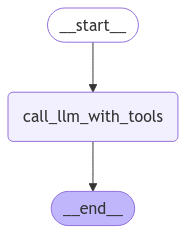

In [25]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke({"messages": [HumanMessage(content="Hi")]})

{'messages': [AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-e27bc5a9-ff33-440e-86e2-1be61f057c4e-0', usage_metadata={'input_tokens': 38, 'output_tokens': 11, 'total_tokens': 49, 'input_token_details': {'cache_read': 0}})]}

In [27]:
graph.invoke({"messages": [HumanMessage(content="Deposiut 7000 in Ahmad Account - his bank num is 001")]})

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"bank_account_no": 1.0, "amount": 7000.0, "name": "Ahmad"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-c660951b-743d-4d05-8e57-69d5478b947b-0', tool_calls=[{'name': 'deposit_money', 'args': {'bank_account_no': 1.0, 'amount': 7000.0, 'name': 'Ahmad'}, 'id': '24be8024-2888-421b-a9c2-88220ea534fe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 57, 'output_tokens': 11, 'total_tokens': 68, 'input_token_details': {'cache_read': 0}})]}

#### Current Flow

- LLM: Call this Tool
- System: Called Tool and told LLM the result.

#### Issue ??: Where is my Human Message

Right now in response we only have AIMessage

#### Solutions:

- Proposal 1: manually Add Messages in call_llm using llm
- Proposal 2: Reducer Functions to Keep History Context